In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import CyclicLR
import torch.nn.functional as F
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# suppress warning
import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from statsmodels.graphics.tsaplots import plot_acf

#import seaborn as sns
#sns.set()

%matplotlib inline

/Users/simaochen/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Data Cleaning

In [2]:
# Get the current directory
current_directory = os.getcwd()

# Define the path to the data folder
data_folder = os.path.join(current_directory, 'data')

# List all files in the data folder
files = os.listdir(data_folder)


# Read each CSV file in the data folder
for file in files:
    if file.endswith('listings2024_03.csv'):
        print("df2024_03")
        file_path1 = os.path.join(data_folder, file)
        df2024_03 = pd.read_csv(file_path1)
    elif file.endswith('listings2024_02.csv'):
        print("df2024_02")
        file_path2 = os.path.join(data_folder, file)
        df2024_02 = pd.read_csv(file_path2)
    elif file.endswith("listings2024_01.csv"):
        print("df2024_01")
        file_path3 = os.path.join(data_folder, file)
        df2024_01 = pd.read_csv(file_path3)
    elif file.endswith("listings2023_12.csv"):
        print("df2023_12")
        file_path4 = os.path.join(data_folder, file)
        df2023_12 = pd.read_csv(file_path4)
    elif file.endswith("listings2023_11.csv"):
        print("df2023_11")
        file_path5 = os.path.join(data_folder, file)
        df2023_11 = pd.read_csv(file_path5)
    elif file.endswith("listings2023_10.csv"):
        print("df2023_10")
        file_path6 = os.path.join(data_folder, file)
        df2023_10 = pd.read_csv(file_path6)
    elif file.endswith("listings2023_09.csv"):
        print("df2023_09")
        file_path7 = os.path.join(data_folder, file)
        df2023_09 = pd.read_csv(file_path7)
    elif file.endswith("listings2023_08.csv"):
        print("df2023_08")
        file_path8 = os.path.join(data_folder, file)
        df2023_08 = pd.read_csv(file_path8)
    elif file.endswith("listings2023_07.csv"):
        print("df2023_07")
        file_path9 = os.path.join(data_folder, file)
        df2023_07 = pd.read_csv(file_path9)        
    elif file.endswith("listings2023_06.csv"):
        print("df2023_06")
        file_path10 = os.path.join(data_folder, file)
        df2023_06 = pd.read_csv(file_path10)        
    elif file.endswith("listings2023_05.csv"):
        print("df2023_05")
        file_path11 = os.path.join(data_folder, file)
        df2023_05 = pd.read_csv(file_path11)
    elif file.endswith("listings2023_04.csv"):
        print("df2023_04")
        file_path12 = os.path.join(data_folder, file)
        df2023_04 = pd.read_csv(file_path12)
  
    


df2023_08
df2024_01
df2023_09
df2024_02
df2024_03
df2023_07
df2023_12
df2023_06
df2023_10
df2023_04
df2023_05
df2023_11


In [3]:
# List of DataFrames
dataframes = [
    df2023_08, df2024_01, df2023_09, df2024_02, df2024_03,
    df2023_07, df2023_12, df2023_06, df2023_10, df2023_04,
    df2023_05, df2023_11
]

# Dictionary to hold the names and lengths
df_lengths = {}

# Iterate through the DataFrames and print their lengths
for i, df in enumerate(dataframes, start=4):
    month_year = f"df2023_{i:02}" if i < 13 else f"df2024_{i - 12:02}"
    df_lengths[month_year] = len(df)

# Print the lengths
for name, length in df_lengths.items():
    print(f"Length of {name}: {length}")

Length of df2023_04: 43582
Length of df2023_05: 39719
Length of df2023_06: 39453
Length of df2023_07: 39202
Length of df2023_08: 39319
Length of df2023_09: 43729
Length of df2023_10: 39627
Length of df2023_11: 43566
Length of df2023_12: 38792
Length of df2024_01: 43241
Length of df2024_02: 43303
Length of df2024_03: 39160


In [4]:
df_missing_values = {}

for i, df in enumerate(dataframes, start=4):
    month_year = f"df2023_{i:02}" if i < 13 else f"df2024_{i - 12:02}"
    df_missing_values[month_year] = df.isnull().sum()

for name, missing_counts in df_missing_values.items():
    print(f"Missing values in {name}:")
    print(missing_counts)
    print() 

Missing values in df2023_04:
id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10603
reviews_per_month                 10603
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           43582
dtype: int64

Missing values in df2023_05:
id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbou

### Add Zipcode

In [5]:
NYCzipcode = gpd.read_file('./Data/ZIPCODE/ZIP_CODE_040114.shp')

In [6]:
"""
Length of df2023_04: 43582
Length of df2023_05: 39719
Length of df2023_06: 39453
Length of df2023_07: 39202
Length of df2023_08: 39319
Length of df2023_09: 43729
Length of df2023_10: 39627
Length of df2023_11: 43566
Length of df2023_12: 38792
"""

'\nLength of df2023_04: 43582\nLength of df2023_05: 39719\nLength of df2023_06: 39453\nLength of df2023_07: 39202\nLength of df2023_08: 39319\nLength of df2023_09: 43729\nLength of df2023_10: 39627\nLength of df2023_11: 43566\nLength of df2023_12: 38792\n'

In [7]:
df2023_04_gdf = gpd.GeoDataFrame(
    df2023_04,
    geometry=gpd.points_from_xy(df2023_04.longitude, df2023_04.latitude),
    crs="EPSG:4326"
)

In [8]:
df2023_05_gdf = gpd.GeoDataFrame(
    df2023_05,
    geometry=gpd.points_from_xy(df2023_05.longitude, df2023_05.latitude),
    crs="EPSG:4326"
)

In [9]:
df2023_06_gdf = gpd.GeoDataFrame(
    df2023_06,
    geometry=gpd.points_from_xy(df2023_06.longitude, df2023_06.latitude),
    crs="EPSG:4326"
)

In [10]:
df2023_07_gdf = gpd.GeoDataFrame(
    df2023_07,
    geometry=gpd.points_from_xy(df2023_07.longitude, df2023_07.latitude),
    crs="EPSG:4326"
)

In [11]:
df2023_08_gdf = gpd.GeoDataFrame(
    df2023_08,
    geometry=gpd.points_from_xy(df2023_08.longitude, df2023_08.latitude),
    crs="EPSG:4326"
)

In [12]:
df2023_09_gdf = gpd.GeoDataFrame(
    df2023_09,
    geometry=gpd.points_from_xy(df2023_09.longitude, df2023_09.latitude),
    crs="EPSG:4326"
)

In [13]:
df2023_10_gdf = gpd.GeoDataFrame(
    df2023_10,
    geometry=gpd.points_from_xy(df2023_10.longitude, df2023_10.latitude),
    crs="EPSG:4326"
)

In [14]:
df2023_11_gdf = gpd.GeoDataFrame(
    df2023_11,
    geometry=gpd.points_from_xy(df2023_11.longitude, df2023_11.latitude),
    crs="EPSG:4326"
)

In [15]:
df2023_12_gdf = gpd.GeoDataFrame(
    df2023_12,
    geometry=gpd.points_from_xy(df2023_12.longitude, df2023_12.latitude),
    crs="EPSG:4326"
)

In [16]:
df2024_01_gdf = gpd.GeoDataFrame(
    df2024_01,
    geometry=gpd.points_from_xy(df2024_01.longitude, df2024_01.latitude),
    crs="EPSG:4326"
)

In [17]:
df2024_02_gdf = gpd.GeoDataFrame(
    df2024_02,
    geometry=gpd.points_from_xy(df2024_02.longitude, df2024_02.latitude),
    crs="EPSG:4326"
)

In [18]:
df2024_03_gdf = gpd.GeoDataFrame(
    df2024_03,
    geometry=gpd.points_from_xy(df2024_03.longitude, df2024_03.latitude),
    crs="EPSG:4326"
)

In [19]:
# 2024_1 with ziocode not all data.
df2024_01_gdf = df2024_01_gdf.to_crs(NYCzipcode.crs)
joined_gdf = gpd.sjoin(df2024_01_gdf, NYCzipcode, how="left", op="within")
unique_zipcodes = joined_gdf.reset_index().groupby('index').first()
airbnb202401_with_zip = df2024_01.merge(unique_zipcodes[['ZIPCODE']], left_index=True, right_index=True, how='left')


In [20]:
# 2023_4 with ziocode not all data.
df2023_04_gdf = df2023_04_gdf.to_crs(NYCzipcode.crs)
joined_gdf = gpd.sjoin(df2023_04_gdf, NYCzipcode, how="left", op="within")
unique_zipcodes = joined_gdf.reset_index().groupby('index').first()
airbnb202304_with_zip = df2023_04.merge(unique_zipcodes[['ZIPCODE']], left_index=True, right_index=True, how='left')


In [21]:
# 2023_5 with ziocode not all data.
df2023_05_gdf = df2023_05_gdf.to_crs(NYCzipcode.crs)
joined_gdf = gpd.sjoin(df2023_05_gdf, NYCzipcode, how="left", op="within")
unique_zipcodes = joined_gdf.reset_index().groupby('index').first()
airbnb202305_with_zip = df2023_05.merge(unique_zipcodes[['ZIPCODE']], left_index=True, right_index=True, how='left')


In [22]:
# 2023_6 with ziocode not all data.
df2023_06_gdf = df2023_06_gdf.to_crs(NYCzipcode.crs)
joined_gdf = gpd.sjoin(df2023_06_gdf, NYCzipcode, how="left", op="within")
unique_zipcodes = joined_gdf.reset_index().groupby('index').first()
airbnb202306_with_zip = df2023_06.merge(unique_zipcodes[['ZIPCODE']], left_index=True, right_index=True, how='left')


In [23]:
# 2023_7 with ziocode not all data.
df2023_07_gdf = df2023_07_gdf.to_crs(NYCzipcode.crs)
joined_gdf = gpd.sjoin(df2023_07_gdf, NYCzipcode, how="left", op="within")
unique_zipcodes = joined_gdf.reset_index().groupby('index').first()
airbnb202307_with_zip = df2023_07.merge(unique_zipcodes[['ZIPCODE']], left_index=True, right_index=True, how='left')


In [24]:
# 2023_8 with ziocode not all data.
df2023_08_gdf = df2023_08_gdf.to_crs(NYCzipcode.crs)
joined_gdf = gpd.sjoin(df2023_08_gdf, NYCzipcode, how="left", op="within")
unique_zipcodes = joined_gdf.reset_index().groupby('index').first()
airbnb202308_with_zip = df2023_08.merge(unique_zipcodes[['ZIPCODE']], left_index=True, right_index=True, how='left')


In [25]:
# 2023_9 with ziocode not all data.
df2023_09_gdf = df2023_09_gdf.to_crs(NYCzipcode.crs)
joined_gdf = gpd.sjoin(df2023_09_gdf, NYCzipcode, how="left", op="within")
unique_zipcodes = joined_gdf.reset_index().groupby('index').first()
airbnb202309_with_zip = df2023_09.merge(unique_zipcodes[['ZIPCODE']], left_index=True, right_index=True, how='left')


In [26]:
# 2023_10 with ziocode not all data.
df2023_10_gdf = df2023_10_gdf.to_crs(NYCzipcode.crs)
joined_gdf = gpd.sjoin(df2023_10_gdf, NYCzipcode, how="left", op="within")
unique_zipcodes = joined_gdf.reset_index().groupby('index').first()
airbnb202310_with_zip = df2023_10.merge(unique_zipcodes[['ZIPCODE']], left_index=True, right_index=True, how='left')


In [27]:
# 2023_11 with ziocode not all data.
df2023_11_gdf = df2023_11_gdf.to_crs(NYCzipcode.crs)
joined_gdf = gpd.sjoin(df2023_11_gdf, NYCzipcode, how="left", op="within")
unique_zipcodes = joined_gdf.reset_index().groupby('index').first()
airbnb202311_with_zip = df2023_11.merge(unique_zipcodes[['ZIPCODE']], left_index=True, right_index=True, how='left')


In [28]:
# 2023_12 with ziocode not all data.
df2023_12_gdf = df2023_12_gdf.to_crs(NYCzipcode.crs)
joined_gdf = gpd.sjoin(df2023_12_gdf, NYCzipcode, how="left", op="within")
unique_zipcodes = joined_gdf.reset_index().groupby('index').first()
airbnb202312_with_zip = df2023_12.merge(unique_zipcodes[['ZIPCODE']], left_index=True, right_index=True, how='left')


In [29]:
# 2024_2 with ziocode not all data.
df2024_02_gdf = df2024_02_gdf.to_crs(NYCzipcode.crs)
joined_gdf = gpd.sjoin(df2024_02_gdf, NYCzipcode, how="left", op="within")
unique_zipcodes = joined_gdf.reset_index().groupby('index').first()
airbnb202402_with_zip = df2024_02.merge(unique_zipcodes[['ZIPCODE']], left_index=True, right_index=True, how='left')


In [30]:
# 2024_3 with ziocode not all data.
df2024_03_gdf = df2024_03_gdf.to_crs(NYCzipcode.crs)
joined_gdf = gpd.sjoin(df2024_03_gdf, NYCzipcode, how="left", op="within")
unique_zipcodes = joined_gdf.reset_index().groupby('index').first()
airbnb202403_with_zip = df2024_03.merge(unique_zipcodes[['ZIPCODE']], left_index=True, right_index=True, how='left')


In [31]:
#Removing the Duplicates if any
airbnb202401_with_zip.duplicated().sum()
airbnb202401_with_zip.drop_duplicates(inplace=True)
len(airbnb202401_with_zip)

39719

In [32]:
#Removing the Duplicates if any
airbnb202402_with_zip.duplicated().sum()
airbnb202402_with_zip.drop_duplicates(inplace=True)
len(airbnb202402_with_zip)

39202

In [33]:
#Removing the Duplicates if any
airbnb202403_with_zip.duplicated().sum()
airbnb202403_with_zip.drop_duplicates(inplace=True)
len(airbnb202403_with_zip)

39319

In [34]:
#Removing the Duplicates if any
airbnb202304_with_zip.duplicated().sum()
airbnb202304_with_zip.drop_duplicates(inplace=True)
len(airbnb202304_with_zip)

43241

In [35]:
#Removing the Duplicates if any
airbnb202305_with_zip.duplicated().sum()
airbnb202305_with_zip.drop_duplicates(inplace=True)
len(airbnb202305_with_zip)

43303

In [36]:
#Removing the Duplicates if any
airbnb202306_with_zip.duplicated().sum()
airbnb202306_with_zip.drop_duplicates(inplace=True)
len(airbnb202306_with_zip)

43566

In [37]:
#Removing the Duplicates if any
airbnb202307_with_zip.duplicated().sum()
airbnb202307_with_zip.drop_duplicates(inplace=True)
len(airbnb202307_with_zip)

43729

In [38]:
#Removing the Duplicates if any
airbnb202308_with_zip.duplicated().sum()
airbnb202308_with_zip.drop_duplicates(inplace=True)
len(airbnb202308_with_zip)

43582

In [39]:
#Removing the Duplicates if any
airbnb202309_with_zip.duplicated().sum()
airbnb202309_with_zip.drop_duplicates(inplace=True)
len(airbnb202309_with_zip)

39453

In [40]:
#Removing the Duplicates if any
airbnb202310_with_zip.duplicated().sum()
airbnb202310_with_zip.drop_duplicates(inplace=True)
len(airbnb202310_with_zip)

38792

In [41]:
#Removing the Duplicates if any
airbnb202311_with_zip.duplicated().sum()
airbnb202311_with_zip.drop_duplicates(inplace=True)
len(airbnb202311_with_zip)

39160

In [42]:
#Removing the Duplicates if any
airbnb202312_with_zip.duplicated().sum()
airbnb202312_with_zip.drop_duplicates(inplace=True)
len(airbnb202312_with_zip)

39627

In [43]:
airbnb202401_with_zip.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'ZIPCODE'],
      dtype='object')

In [44]:
airbnb202402_with_zip.columns == airbnb202401_with_zip.columns 
airbnb202402_with_zip.columns == airbnb202403_with_zip.columns
airbnb202402_with_zip.columns == airbnb202304_with_zip.columns
airbnb202402_with_zip.columns == airbnb202305_with_zip.columns
airbnb202402_with_zip.columns == airbnb202306_with_zip.columns
airbnb202402_with_zip.columns == airbnb202307_with_zip.columns
airbnb202402_with_zip.columns == airbnb202308_with_zip.columns
airbnb202402_with_zip.columns == airbnb202309_with_zip.columns
airbnb202402_with_zip.columns == airbnb202310_with_zip.columns
airbnb202402_with_zip.columns == airbnb202311_with_zip.columns
airbnb202402_with_zip.columns == airbnb202312_with_zip.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

### Crime Data

In [45]:
file_path_crimes = os.path.join(data_folder, 'NYPD_Hate_Crimes_20240305.csv')
crimes = pd.read_csv(file_path_crimes)
crimes.head()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
0,202206012204617,2022,3,03/07/2022,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
1,202006012153917,2020,2,02/08/2020,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
2,202306012418117,2023,5,05/23/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
3,202306012285217,2023,4,04/02/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
4,202306012358417,2023,4,05/01/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN


## Descriptive Analysis

In [46]:
crimes.dtypes

Full Complaint ID                  int64
Complaint Year Number              int64
Month Number                       int64
Record Create Date                object
Complaint Precinct Code            int64
Patrol Borough Name               object
County                            object
Law Code Category Description     object
Offense Description               object
PD Code Description               object
Bias Motive Description           object
Offense Category                  object
Arrest Date                      float64
Arrest Id                         object
dtype: object

In [47]:
crimes.County.unique()

array(['KINGS', 'NEW YORK', 'QUEENS', 'BRONX', 'RICHMOND'], dtype=object)

In [48]:
airbnb202401_with_zip.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [49]:
# Kings= Brooklyn, RichMond= Staten Island
county_to_borough = {
    'KINGS': 'Brooklyn',
    'NEW YORK': 'Manhattan',
    'QUEENS': 'Queens',
    'BRONX': 'Bronx',
    'RICHMOND': 'Staten Island'
}

# Replace the county names with borough names in the 'County' column
crimes['County'] = crimes['County'].replace(county_to_borough)

In [50]:
crimes.County.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [51]:
crimes.shape

(2406, 14)

### Rental Income

In [52]:
rental = pd.read_csv("./Data/DOF_Condominium_Comparable_Rental_Income_in_NYC_20231211.csv")

In [53]:
rental_gross_income = rental.groupby(['Neighborhood']).agg({'Gross Income per SqFt': 'mean'})
rental_gross_income.sort_index(inplace=True)
rental_gross_income.head()

,Gross Income per SqFt
Neighborhood,
15TH Q QUEENS,29.626667
2999,12.600000
30TH Q BROOKLYN,20.820000
50TH Q BROOKLYN,24.882500
5TH Q BROOKLYN,26.815000


In [54]:
airbnb_neighbor_price = df2024_01.groupby(['neighbourhood']).agg({'price': 'mean'})
airbnb_neighbor_price.head()

,price
neighbourhood,
Allerton,117.904762
Arden Heights,115.000000
Arrochar,137.666667
Arverne,220.280000
Astoria,117.700000


In [55]:
airbnb_neighbor_price.index = airbnb_neighbor_price.index.str.upper()
filtered_rental_gross_income = rental_gross_income[rental_gross_income.index.isin(airbnb_neighbor_price.index)]
filtered_rental_gross_income.head()

,Gross Income per SqFt
Neighborhood,
ARVERNE,29.905000
ASTORIA,27.833360
BATH BEACH,17.751803
BAY RIDGE,20.267846
BAYSIDE,23.749327


In [56]:
Rental_marketvalue = rental.groupby(['Neighborhood']).agg({'Market Value per SqFt': 'mean'})
filtered_Rental_marketvalue = Rental_marketvalue[Rental_marketvalue.index.isin(airbnb_neighbor_price.index)]
filtered_Rental_marketvalue.head()

,Market Value per SqFt
Neighborhood,
ARVERNE,137.250000
ASTORIA,143.843281
BATH BEACH,73.815082
BAY RIDGE,90.857385
BAYSIDE,120.646635


## Exploratory Analysis

(目前只做了202401 后面需要可以直接copy代码改数)

In [57]:
#drop unnecessary columns
df2024_01.drop(['name','id','host_name','last_review','number_of_reviews_ltm', 'license'], axis=1, inplace=True)
df2024_01.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [58]:
#select the number columns
numeric_df = df2024_01.select_dtypes(include=[np.number])


Get Correlation between different variables

<Axes: >

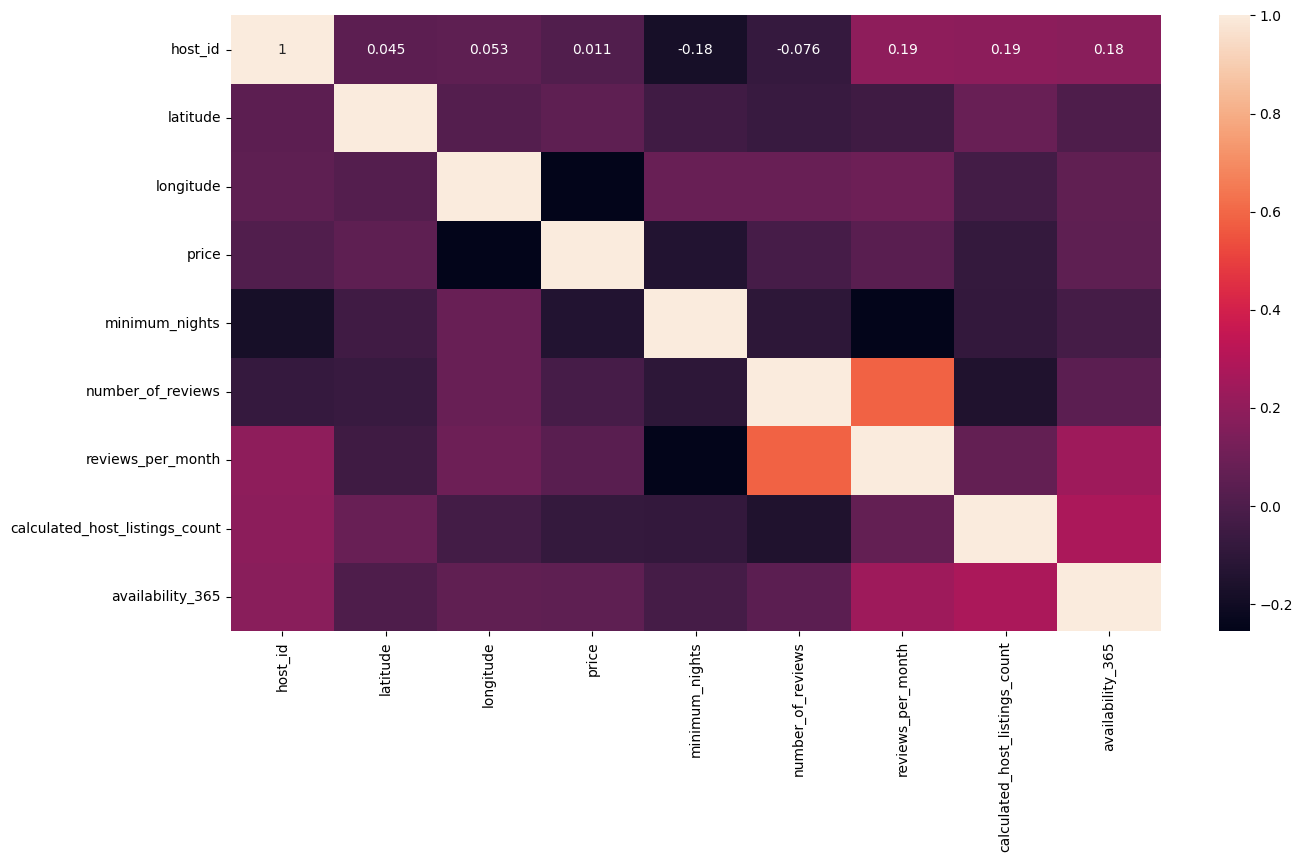

In [59]:
corr = numeric_df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

Plot all Neighbourhood Group

Text(0.5, 1.0, 'Neighbourhood Group')

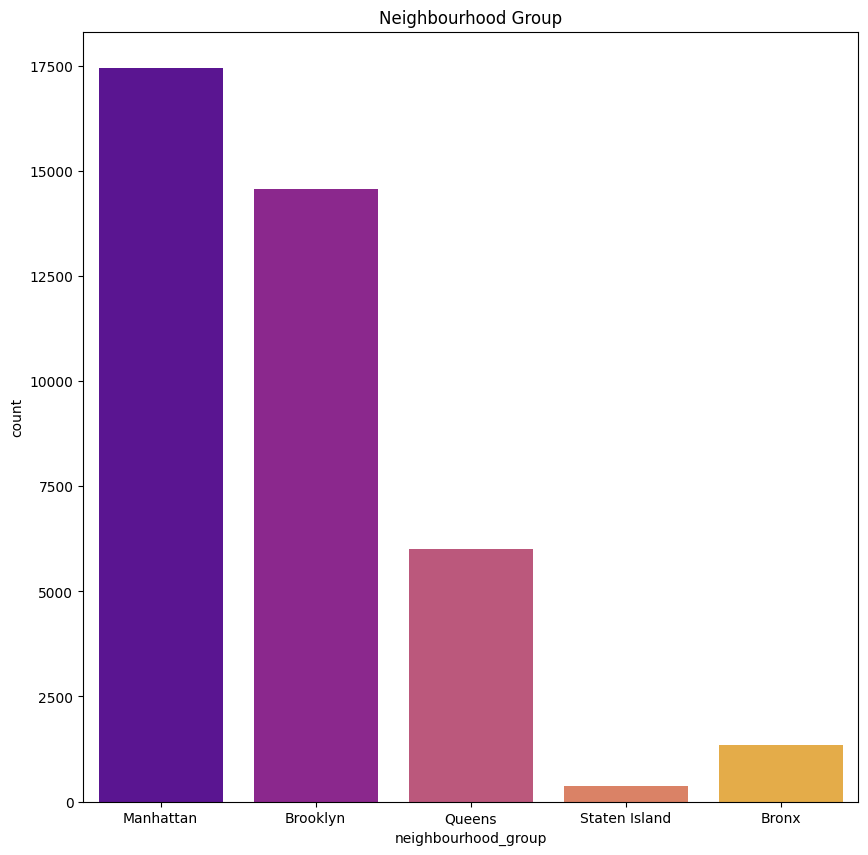

In [60]:
sns.countplot(x='neighbourhood_group', data=df2024_01, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

Neighbourhood

Text(0.5, 1.0, 'Neighbourhood')

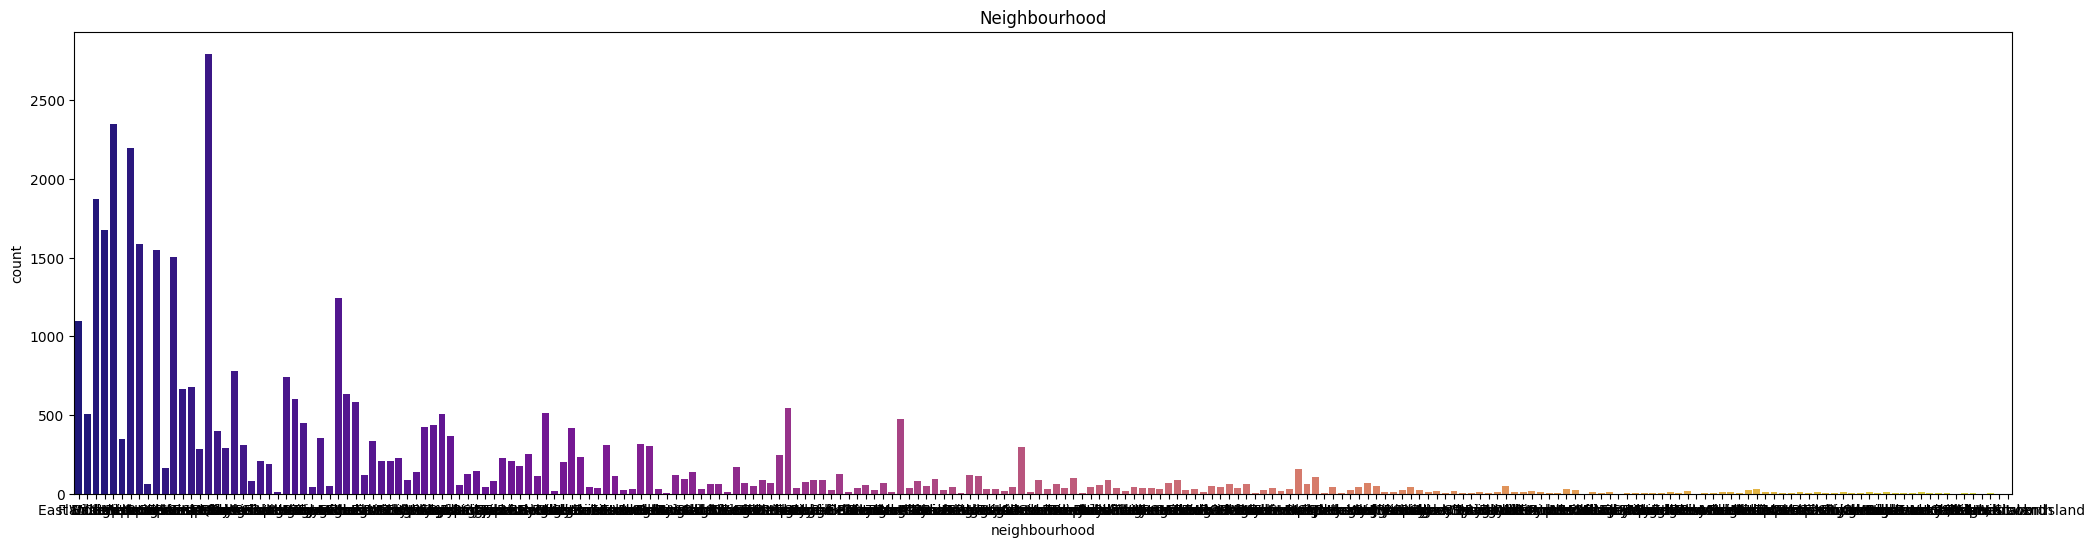

In [61]:
sns.countplot(x='neighbourhood', data=df2024_01, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')


In [62]:
df2024_01['neighbourhood'] = df2024_01['neighbourhood'].astype(str)

Room Type

Text(0.5, 1.0, 'Restaurants delivering online or Not')

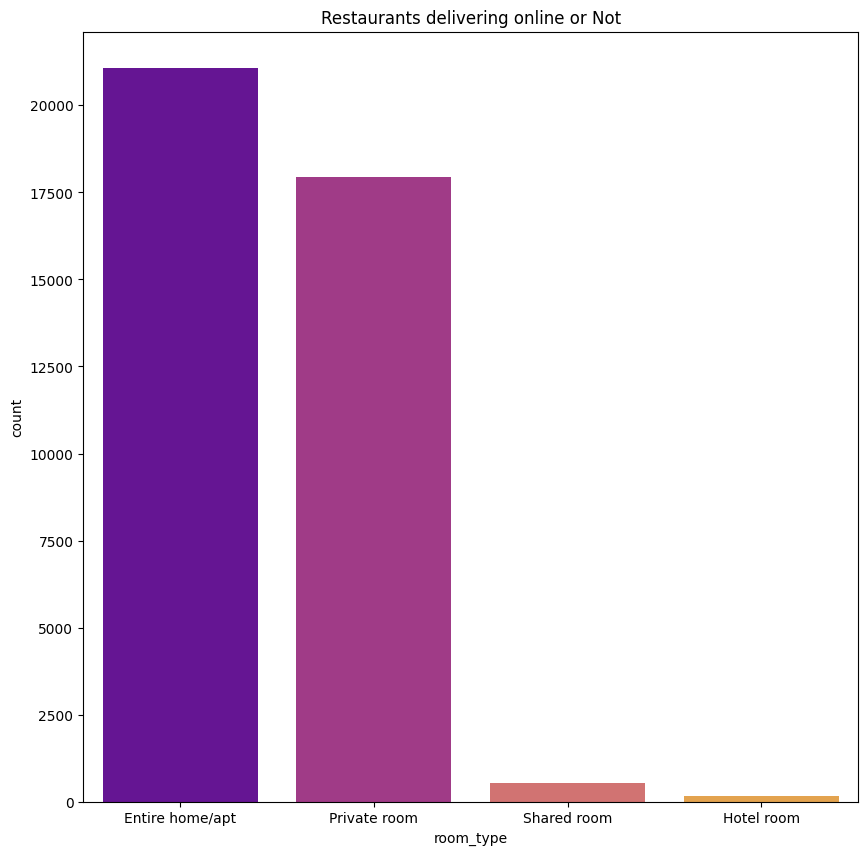

In [63]:
#Restaurants delivering Online or not
sns.countplot(x='room_type', data=df2024_01, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

Relation between neighbourgroup and Availability of Room¶


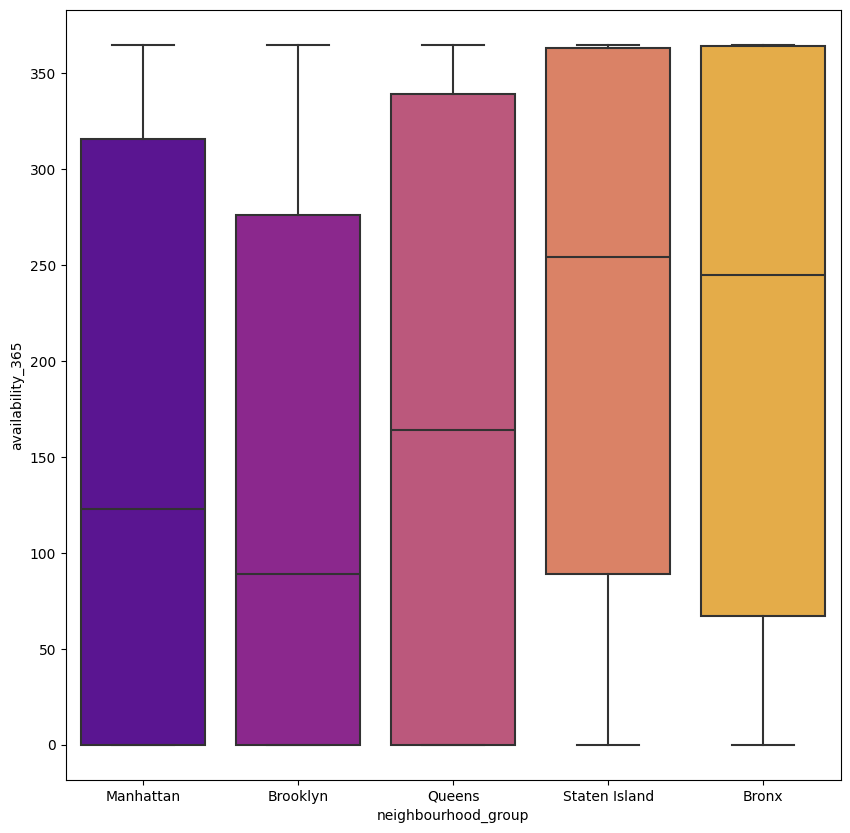

In [64]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df2024_01, x='neighbourhood_group',y='availability_365',palette='plasma')

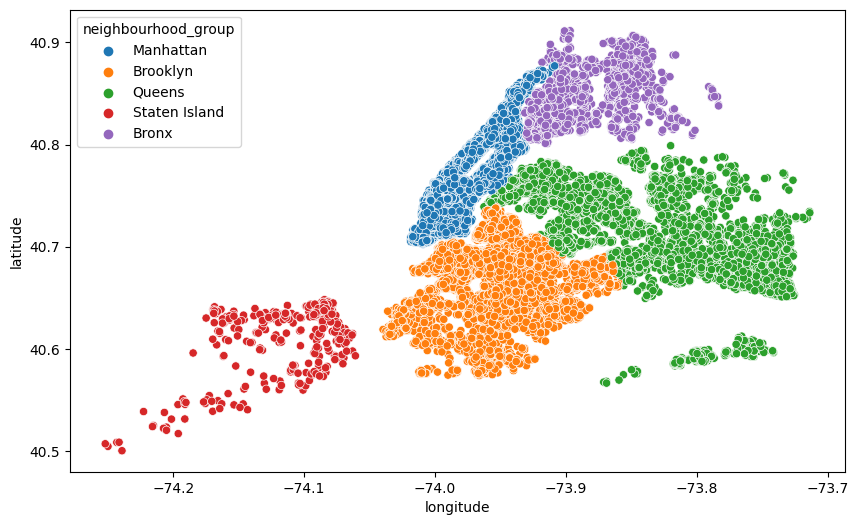

In [65]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df2024_01['longitude'], y=df2024_01['latitude'], hue=df2024_01['neighbourhood_group'])
plt.ioff()

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df2024_01['longitude'], y=df2024_01['latitude'], hue=df2024_01['availability_365'])
plt.ioff()

In [67]:
df2024_01.head()
#发现availability_365数据有问题

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,5448955,Manhattan,East Village,40.73179,-73.98679,Entire home/apt,NaN,30,15,0.20,1,0
1,83422715,Brooklyn,Flatbush,40.65375,-73.95502,Entire home/apt,289.0,30,0,NaN,1,365
2,43719554,Manhattan,Harlem,40.82440,-73.94598,Private room,NaN,30,0,NaN,1,0
3,5925222,Brooklyn,Bushwick,40.69020,-73.91782,Entire home/apt,NaN,30,1,0.01,1,0
4,268631641,Manhattan,East Village,40.72385,-73.97695,Private room,NaN,30,1,0.02,1,0


### Time Series

### PCA...

In [68]:
df2024_01.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,5448955,Manhattan,East Village,40.73179,-73.98679,Entire home/apt,NaN,30,15,0.20,1,0
1,83422715,Brooklyn,Flatbush,40.65375,-73.95502,Entire home/apt,289.0,30,0,NaN,1,365
2,43719554,Manhattan,Harlem,40.82440,-73.94598,Private room,NaN,30,0,NaN,1,0
3,5925222,Brooklyn,Bushwick,40.69020,-73.91782,Entire home/apt,NaN,30,1,0.01,1,0
4,268631641,Manhattan,East Village,40.72385,-73.97695,Private room,NaN,30,1,0.02,1,0


## Nueral Nets

## Concatenate all the airbnb data with zip from 2023-04 to 2024-02 as one dataframe
### Later, we will splite this dataset as Train and Validation set
### Then, we will treat 2024-03 as the test set (or make predictions on them)

In [293]:
combined_data = pd.concat([airbnb202304_with_zip, 
                           airbnb202305_with_zip, 
                           airbnb202306_with_zip, 
                           airbnb202307_with_zip,
                           airbnb202308_with_zip, 
                           airbnb202309_with_zip, 
                           airbnb202310_with_zip, 
                           airbnb202311_with_zip,
                           airbnb202312_with_zip,
                           airbnb202401_with_zip,
                           airbnb202402_with_zip, 
                           airbnb202403_with_zip], ignore_index=True)

In [294]:
# combined_data = airbnb202402_with_zip
combined_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,ZIPCODE
0,609278205075943432,"Grace , beauty and peace",455175874,Larry,Queens,College Point,40.777122,-73.847305,Private room,100.0,1,0,NaN,NaN,1,365,0,NaN,11356
1,765948794133787266,Brooklyn Refuge,488760226,Eric,Brooklyn,Canarsie,40.648510,-73.894330,Private room,30.0,2,18,2023-03-19,4.46,2,9,18,NaN,11236
2,550274125926615886,Perfect for taking a nigth off,240094957,Gloria,Queens,Glendale,40.704280,-73.894360,Private room,135.0,1,0,NaN,NaN,1,365,0,NaN,11385
3,625396851096244118,1 room in house to rent,16640515,James,Brooklyn,Flatlands,40.621193,-73.926361,Private room,70.0,3,0,NaN,NaN,2,362,0,NaN,11234
4,668336778831639835,Private 1 bedroom in Bushwick townhouse,258072,Isabella,Brooklyn,Bushwick,40.688373,-73.907095,Entire home/apt,80.0,30,10,2023-01-22,1.69,2,96,10,NaN,11207


In [296]:
combined_data.shape

(492693, 19)

In [297]:
combined_data = combined_data.dropna()

In [298]:
combined_data.shape

(16769, 19)

In [299]:
combined_data.columns, combined_data.shape

(Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
        'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
        'minimum_nights', 'number_of_reviews', 'last_review',
        'reviews_per_month', 'calculated_host_listings_count',
        'availability_365', 'number_of_reviews_ltm', 'license', 'ZIPCODE'],
       dtype='object'),
 (16769, 19))

In [300]:
combined_data.rename(columns={'neighbourhood_group': 'borough'}, inplace=True)
combined_data.last_review = pd.to_datetime(combined_data.last_review )
combined_data['days_since_last_review'] = (pd.to_datetime('today') - combined_data['last_review']).dt.days

In [301]:
combined_data = combined_data.drop(["license"], axis = 1)
combined_data = combined_data.drop(["id"], axis = 1)
combined_data = combined_data.drop(["host_id"], axis = 1)
combined_data = combined_data.drop(["last_review"], axis = 1)
combined_data = combined_data.drop(["number_of_reviews_ltm"], axis = 1)
# combined_data = combined_data.drop(["host_name"], axis = 1)
# combined_data = combined_data.drop(["name"], axis = 1)

In [302]:
combined_data.shape

(16769, 15)

In [303]:
combined_data.shape

(16769, 15)

In [304]:
combined_data.dtypes

name                               object
host_name                          object
borough                            object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
ZIPCODE                            object
days_since_last_review              int64
dtype: object

In [305]:
len(combined_data)

16769

In [306]:
y = combined_data['price'].values

In [307]:
combined_data.shape, y.shape

((16769, 15), (16769,))

In [308]:
combined_data = combined_data.drop(columns=['price'])

In [309]:
len(y)

16769

In [310]:
combined_data.dtypes

name                               object
host_name                          object
borough                            object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
ZIPCODE                            object
days_since_last_review              int64
dtype: object

In [311]:
# one-hot 
encoder = OneHotEncoder(sparse_output=False)
categorical_features = encoder.fit_transform(combined_data[['room_type', 'neighbourhood', 'borough', 'ZIPCODE']])

# ompute missing values in numerical columns before scaling
imputer = SimpleImputer(strategy='mean')
numerical_columns = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'days_since_last_review']
numerical_features = imputer.fit_transform(combined_data[numerical_columns])

scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# combine
X = np.hstack((categorical_features, numerical_features_scaled))


In [313]:
X.shape, y.shape

((16769, 343), (16769,))

In [314]:
y.shape

(16769,)

In [316]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [319]:
y_train.shape, X_train.shape, X_val.shape, y_val.shape

((15092,), (15092, 343), (1677, 343), (1677,))

In [320]:
type(X_train)

numpy.ndarray

In [278]:
X_train_df = pd.DataFrame(X_train)
X_train_filled = X_train_df.fillna(X_train_df.mean())
X_train_filled_array = X_train_filled.values

In [279]:
X_train = X_train_filled_array

In [280]:
y_train_series = pd.Series(y_train)
y_train_filled = y_train_series.fillna(y_train_series.mean())
y_train_filled_array = y_train_filled.values
y_train = y_train_filled_array

In [281]:
y_val_df = pd.DataFrame(y_val)
y_val_filled = y_val_df.fillna(y_val_df.mean())
y_val_filled_array = y_val_filled.values
y_val = y_val_filled_array

In [282]:
X_val_df = pd.DataFrame(X_val)
X_val_filled = X_val_df.fillna(X_val_df.mean())
X_val_filled_array = X_val_filled.values
X_val = X_val_filled_array

In [321]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)    
# y_test_tensor = torch.tensor(y_test_filled, dtype=torch.float32).view(-1, 1)  


train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)
# test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64

# data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [322]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [323]:
type(val_dataset)

torch.utils.data.dataset.TensorDataset

In [324]:
print("X_train_tensor shape:", X_train_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)


X_train_tensor shape: torch.Size([15092, 343])
y_train_tensor shape: torch.Size([15092, 1])


In [325]:
print("X_train_tensor shape:", X_val_tensor.shape)
print("y_train_tensor shape:", y_val_tensor.shape)

X_train_tensor shape: torch.Size([1677, 343])
y_train_tensor shape: torch.Size([1677, 1])


In [342]:
import torch.nn.functional as F

class AirbnbPricePredictor(nn.Module):
    def __init__(self, input_size):
        super(AirbnbPricePredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, 2048)
        self.fc5 = nn.Linear(2048, 1024)
        self.fc6 = nn.Linear(1024, 512)
        self.fc7 = nn.Linear(512, 256)
        self.fc8 = nn.Linear(256, 128)
        self.fc9 = nn.Linear(128, 64)
        self.fc10 = nn.Linear(64, 1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        x = self.fc10(x)
        return x

#         self.dropout = nn.Dropout(0.5)  # Adding dropout layer
#         self.batch_norm1 = nn.BatchNorm1d(256)  # Adding batch normalization layer
#         self.batch_norm2 = nn.BatchNorm1d(512)
#         self.batch_norm3 = nn.BatchNorm1d(1024)
#         self.batch_norm4 = nn.BatchNorm1d(512)
#         self.batch_norm5 = nn.BatchNorm1d(256)

#     def forward(self, x):
#         x = F.relu(self.batch_norm1(self.fc1(x)))
#         x = F.relu(self.batch_norm2(self.fc2(x)))
#         x = F.relu(self.batch_norm3(self.fc3(x)))
#         x = F.relu(self.batch_norm4(self.fc4(x)))
#         x = F.relu(self.batch_norm5(self.fc5(x)))
#         x = F.relu(self.fc6(x))
#         x = F.relu(self.fc7(x))
#         x = self.fc8(x)
#         return x


In [327]:
# class AirbnbPricePredictor(nn.Module):
#     def __init__(self, input_size):
#         super(AirbnbPricePredictor, self).__init__()
#         self.fc1 = nn.Linear(input_size, 256)  # Increased hidden layer size
#         self.fc2 = nn.Linear(256, 512)         # Increased hidden layer size
#         self.fc3 = nn.Linear(512, 1024) 
#         self.fc4 = nn.Linear(1024, 512)
#         self.fc5 = nn.Linear(512, 256)   # Increased hidden layer size
#         self.fc6 = nn.Linear(256, 168)
#         self.fc7 = nn.Linear(168, 64)
#         self.fc8 = nn.Linear(64, 1)

#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = F.relu(self.fc3(x))
#         x = F.relu(self.fc4(x))
#         x = F.relu(self.fc5(x))
#         x = F.relu(self.fc6(x))
#         x = F.relu(self.fc7(x))
# #         x = F.relu(self.fc8(x))
#         x = self.fc8(x)
#         return x
# import torch.nn as nn
# import torch.nn.functional as F

# class AirbnbPricePredictor(nn.Module):
#     def __init__(self, input_size):
#         super(AirbnbPricePredictor, self).__init__()
#         self.fc1 = nn.Linear(input_size, 256)
#         self.bn1 = nn.BatchNorm1d(256)  
#         self.fc2 = nn.Linear(256, 128)
#         self.bn2 = nn.BatchNorm1d(128)  
#         self.fc3 = nn.Linear(128, 64)
#         self.bn3 = nn.BatchNorm1d(64)   
#         self.fc4 = nn.Linear(64, 32)
#         self.fc5 = nn.Linear(32, 1)

#     def forward(self, x):
#         x = F.relu(self.bn1(self.fc1(x)))  
#         x = F.relu(self.bn2(self.fc2(x))) 
#         x = F.relu(self.bn3(self.fc3(x)))  
#         x = F.relu(self.fc4(x))
#         x = self.fc5(x)
#         return x


In [108]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.optim.lr_scheduler import ReduceLROnPlateau

# # Assuming model and other components are already defined and initialized
# optimizer = optim.Adam(model.parameters(), lr=0.0002)
# scheduler = ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.5, verbose=True)

# epochs = 200
# best_val_loss = float('inf')
# threshold = 0.1  # Define a threshold for accuracy (e.g., 10%)

# def calculate_accuracy(outputs, labels, threshold):
#     abs_diff = torch.abs(outputs - labels)
#     allowed_diff = threshold * torch.abs(labels)
#     return torch.mean((abs_diff <= allowed_diff).float()).item()

# for epoch in range(epochs):
#     model.train()
#     train_loss = 0.0
#     train_acc = 0.0
#     total_samples = 0

#     for inputs, labels in train_loader:
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item() * inputs.size(0)
#         train_acc += calculate_accuracy(outputs, labels, threshold) * inputs.size(0)
#         total_samples += inputs.size(0)

#     train_loss /= total_samples
#     train_acc /= total_samples

#     model.eval()
#     val_loss = 0.0
#     val_acc = 0.0
#     with torch.no_grad():
#         for inputs, labels in val_loader:
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             val_loss += loss.item() * inputs.size(0)
#             val_acc += calculate_accuracy(outputs, labels, threshold) * inputs.size(0)

#     val_loss /= len(val_loader.dataset)
#     val_acc /= len(val_loader.dataset)

#     print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2%}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2%}')
#     scheduler.step(val_loss)

#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         # Save model checkpoint here if needed
#     else:
#         print("No improvement in validation loss, consider stopping training")


In [144]:
# input_size = X_train_tensor.shape[1]
# model = AirbnbPricePredictor(input_size)
# criterion = nn.MSELoss(reduction='mean')
# optimizer = optim.Adam(model.parameters(), lr=0.0002)
# # scheduler = StepLR(optimizer, step_size=50, gamma=0.1)  # Adjust step_size and gamma as needed

# epochs = 200
# threshold = 0.1  # Define a threshold for accuracy (e.g., 10%)


In [239]:
# input_size = X_train_tensor.shape[1]
# model = AirbnbPricePredictor(input_size)
# criterion = nn.L1Loss(reduction='mean')  # Using L1Loss for Mean Absolute Error
# optimizer = optim.Adam(model.parameters(), lr=0.0002)
# scheduler = StepLR(optimizer, step_size=50, gamma=0.1)

# epochs = 200
# threshold = 0.1  # 10% threshold

# def calculate_accuracy(outputs, labels, threshold):
#     abs_diff = torch.abs(outputs - labels)
#     allowed_diff = threshold * torch.abs(labels)
#     return torch.mean((abs_diff <= allowed_diff).float()).item()

# for epoch in range(epochs):
#     model.train()
#     running_loss = 0.0
#     train_accuracy = 0.0
#     total_samples = 0

#     for inputs, labels in train_loader:
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item() * inputs.size(0)
#         train_accuracy += calculate_accuracy(outputs, labels, threshold) * inputs.size(0)
#         total_samples += inputs.size(0)

#     scheduler.step()
#     epoch_loss = running_loss / total_samples
#     epoch_train_accuracy = train_accuracy / total_samples

#     model.eval()
#     val_loss = 0.0
#     val_accuracy = 0.0
#     with torch.no_grad():
#         for inputs, labels in val_loader:
#             outputs = model(inputs)
#             val_loss += criterion(outputs, labels).item() * inputs.size(0)
#             val_accuracy += calculate_accuracy(outputs, labels, threshold) * inputs.size(0)
            
#     epoch_val_loss = val_loss / len(val_loader.dataset)
#     epoch_val_accuracy = val_accuracy / len(val_loader.dataset)
    
#     print(f'Epoch {epoch+1}/{epochs}, Training MAE: {epoch_loss:.4f}, Train Acc: {epoch_train_accuracy:.2%}, Validation MAE: {epoch_val_loss:.4f}, Val Acc: {epoch_val_accuracy:.2%}')


In [242]:
# for epoch in range(epochs):
#     model.train()
#     running_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0

#     for inputs, labels in train_loader:
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()

#         # Calculate the accuracy-like metric
#         with torch.no_grad():
#             abs_percentage_error = torch.abs((outputs - labels) / labels)
#             correct_predictions += torch.sum(abs_percentage_error < threshold).item()
#             total_samples += labels.size(0)
        
#     scheduler.step()
#     epoch_loss = running_loss / len(train_loader)
#     train_accuracy = correct_predictions / total_samples

#     model.eval()
#     val_loss = 0.0
#     with torch.no_grad():
#         for inputs, labels in val_loader:
#             outputs = model(inputs)
#             val_loss += criterion(outputs, labels).item()
            
#     epoch_val_loss = val_loss / len(val_loader)
    
#     print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Train Acc: {train_accuracy:.2%}')



In [343]:
input_size = X_train_tensor.shape[1]
print(input_size)
model = AirbnbPricePredictor(input_size)

# criterion = nn.MSELoss()
criterion = nn.L1Loss(reduction='mean')
optimizer = optim.Adam(model.parameters(), lr=0.0002)

# optimizer = optim.Adamax(model.parameters(), lr=0.002, betas=(0.9, 0.999))
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


# optimizer = optim.SGD(model.parameters(), lr=0.1)

# Define cyclic learning rate scheduler
# step_size_up = 100  # Number of steps for the learning rate to increase
# step_size_down = 200  # Number of steps for the learning rate to decrease
# base_lr = 0.001  # Lower boundary for learning rate
# max_lr = 0.01  # Upper boundary for learning rate
# clr_scheduler = CyclicLR(optimizer, base_lr=base_lr, max_lr=max_lr,
#                          step_size_up=step_size_up, step_size_down=step_size_down)



343


In [345]:
threshold = 0.1

# Training loop
epochs = 300
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    train_correct_predictions = 0  # Separate variables for training accuracy calculation
    train_total_predictions = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # Check for NaN values in inputs
        if np.isnan(inputs).any():
            print("NaN values detected in inputs!")
            # Handle NaN values appropriately
            
        # Check for NaN values in labels
        if np.isnan(labels).any():
            print("NaN values detected in labels!")
            # Handle NaN values appropriately
            
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        
        # Calculate absolute percentage error for accuracy-like metric
        abs_percentage_error = torch.abs(outputs - labels) / labels
        
        # Count correct predictions within the threshold
        train_correct_predictions += torch.sum(abs_percentage_error <= threshold)
        train_total_predictions += len(labels)
        
    epoch_loss = running_loss / len(train_loader.dataset)
    training_accuracy = train_correct_predictions / train_total_predictions  # Using separate variables
    
    model.eval()
    val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            
            # Calculate absolute percentage error for accuracy-like metric
            abs_percentage_error = torch.abs(outputs - labels) / labels
            
            # Count correct predictions within the threshold
            correct_predictions += torch.sum(abs_percentage_error <= threshold)
            total_predictions += len(labels)
    
    epoch_val_loss = val_loss / len(val_loader.dataset)
    validation_accuracy = correct_predictions / total_predictions
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Training Accuracy: {training_accuracy:.2%}, Validation Accuracy: {validation_accuracy:.2%}')


Epoch 1/300, Loss: 99.7932, Val Loss: 96.6554, Training Accuracy: 27.27%, Validation Accuracy: 26.42%
Epoch 2/300, Loss: 98.1896, Val Loss: 99.4591, Training Accuracy: 27.63%, Validation Accuracy: 22.06%


KeyboardInterrupt: 

In [329]:
threshold = 0.1

# Training loop
epochs = 200
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # Check for NaN values in inputs
        if np.isnan(inputs).any():
            print("NaN values detected in inputs!")
            # Handle NaN values appropriately
            
        # Check for NaN values in labels
        if np.isnan(labels).any():
            print("NaN values detected in labels!")
            # Handle NaN values appropriately
            
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        
        # Calculate absolute percentage error for accuracy-like metric
        abs_percentage_error = torch.abs(outputs - labels) / labels
        
        # Count correct predictions within the threshold
        correct_predictions += torch.sum(abs_percentage_error <= threshold)
        total_predictions += len(labels)
        
    epoch_loss = running_loss / len(train_loader.dataset)
    accuracy = correct_predictions / total_predictions
    
    model.eval()
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            
    epoch_val_loss = val_loss / len(val_loader.dataset)
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Accuracy: {accuracy:.2%}')


Epoch 1/200, Loss: 168.3001, Val Loss: 124.9578, Accuracy: 11.71%
Epoch 2/200, Loss: 128.2377, Val Loss: 120.4401, Accuracy: 17.61%
Epoch 3/200, Loss: 124.4717, Val Loss: 116.1181, Accuracy: 18.64%
Epoch 4/200, Loss: 120.8779, Val Loss: 116.3538, Accuracy: 19.43%
Epoch 5/200, Loss: 117.1665, Val Loss: 113.6018, Accuracy: 20.92%
Epoch 6/200, Loss: 114.7732, Val Loss: 109.5894, Accuracy: 22.02%
Epoch 7/200, Loss: 112.7085, Val Loss: 108.1930, Accuracy: 22.44%
Epoch 8/200, Loss: 110.3938, Val Loss: 110.2880, Accuracy: 23.36%
Epoch 9/200, Loss: 108.7588, Val Loss: 105.4420, Accuracy: 24.20%
Epoch 10/200, Loss: 107.2472, Val Loss: 103.8024, Accuracy: 25.37%
Epoch 11/200, Loss: 105.2711, Val Loss: 102.6334, Accuracy: 26.31%
Epoch 12/200, Loss: 104.1550, Val Loss: 100.9852, Accuracy: 27.14%
Epoch 13/200, Loss: 103.3348, Val Loss: 100.5905, Accuracy: 27.13%
Epoch 14/200, Loss: 101.4145, Val Loss: 101.3124, Accuracy: 27.88%
Epoch 15/200, Loss: 101.0820, Val Loss: 99.2543, Accuracy: 27.79%
Epoch

Epoch 127/200, Loss: 52.0340, Val Loss: 80.5193, Accuracy: 54.47%
Epoch 128/200, Loss: 51.8580, Val Loss: 81.0525, Accuracy: 54.48%
Epoch 129/200, Loss: 52.4055, Val Loss: 81.9949, Accuracy: 54.64%
Epoch 130/200, Loss: 52.0484, Val Loss: 82.3122, Accuracy: 54.01%
Epoch 131/200, Loss: 51.8607, Val Loss: 82.4011, Accuracy: 54.72%
Epoch 132/200, Loss: 51.2038, Val Loss: 81.7372, Accuracy: 54.66%
Epoch 133/200, Loss: 51.4809, Val Loss: 80.9253, Accuracy: 55.14%
Epoch 134/200, Loss: 50.7211, Val Loss: 81.4407, Accuracy: 55.12%
Epoch 135/200, Loss: 51.2281, Val Loss: 81.3846, Accuracy: 54.66%
Epoch 136/200, Loss: 50.9472, Val Loss: 81.6049, Accuracy: 55.55%
Epoch 137/200, Loss: 50.8351, Val Loss: 80.4223, Accuracy: 55.44%
Epoch 138/200, Loss: 50.1471, Val Loss: 83.1796, Accuracy: 55.73%
Epoch 139/200, Loss: 50.6501, Val Loss: 80.6265, Accuracy: 55.59%
Epoch 140/200, Loss: 50.7874, Val Loss: 80.2007, Accuracy: 55.55%
Epoch 141/200, Loss: 50.5109, Val Loss: 81.7595, Accuracy: 56.13%
Epoch 142/

In [253]:
# Training loop
threshold = 0.1
epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_predictions_train = 0
    total_predictions_train = 0
    
    for inputs, labels in train_loader:
#         print(inputs)
#         break
        optimizer.zero_grad()
        outputs = model(inputs)
#         print("outputs", outputs)
        loss = criterion(outputs, labels)
#         print("labels", labels)
        
        # backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # calculate training loss
        running_loss += loss.item() * inputs.size(0)
        
        # calculate absolute percentage error for training accuracy-like metric
        abs_percentage_error_train = torch.abs(outputs - labels) / labels
#         print("abs_percentage_error_train", abs_percentage_error_train)
        
        # count correct predictions within the threshold for training
        correct_predictions_train += torch.sum(abs_percentage_error_train <= threshold)
#         print("correct_predictions_train", correct_predictions_train)
        total_predictions_train += len(labels)
#         print("total_predictions_train", total_predictions_train)
        
        
    #training accuracy
    accuracy_train = correct_predictions_train/ total_predictions_train

    
    #training loss
    epoch_loss = running_loss / len(train_loader.dataset)
    
    #evaluation on validation set
    model.eval()
    val_loss = 0.0
    correct_predictions_val = 0
    total_predictions_val = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            
            abs_percentage_error_val = torch.abs(outputs - labels) / labels
            
            correct_predictions_val += torch.sum(abs_percentage_error_val <= threshold)
            total_predictions_val += len(labels)
    
    # validation loss and accuracy
    epoch_val_loss = val_loss / len(val_loader.dataset)
    accuracy_val = correct_predictions_val.float() / total_predictions_val
    
    # metrics
    print(f'Epoch {epoch+1}/{epochs}, '
          f'Train Loss: {epoch_loss:.4f}, Train Accuracy: {accuracy_train:.2%}, '
          f'Val Loss: {epoch_val_loss:.4f}, Val Accuracy: {accuracy_val:.2%}, '
         )
#     break


Epoch 1/100, Train Loss: 70.2515, Train Accuracy: 53.66%, Val Loss: 124.8512, Val Accuracy: 22.26%, 
Epoch 2/100, Train Loss: 70.0175, Train Accuracy: 53.38%, Val Loss: 126.2065, Val Accuracy: 22.57%, 
Epoch 3/100, Train Loss: 69.7844, Train Accuracy: 54.39%, Val Loss: 125.9621, Val Accuracy: 21.63%, 
Epoch 4/100, Train Loss: 70.0324, Train Accuracy: 53.83%, Val Loss: 126.1993, Val Accuracy: 20.38%, 
Epoch 5/100, Train Loss: 69.6004, Train Accuracy: 54.01%, Val Loss: 125.6153, Val Accuracy: 22.26%, 
Epoch 6/100, Train Loss: 69.4743, Train Accuracy: 54.91%, Val Loss: 125.6641, Val Accuracy: 21.63%, 
Epoch 7/100, Train Loss: 69.2675, Train Accuracy: 55.33%, Val Loss: 126.1042, Val Accuracy: 21.00%, 
Epoch 8/100, Train Loss: 69.0411, Train Accuracy: 55.37%, Val Loss: 125.9050, Val Accuracy: 23.82%, 
Epoch 9/100, Train Loss: 69.0106, Train Accuracy: 54.29%, Val Loss: 126.8775, Val Accuracy: 21.32%, 
Epoch 10/100, Train Loss: 69.0663, Train Accuracy: 54.81%, Val Loss: 126.8942, Val Accuracy

Epoch 83/100, Train Loss: 60.1098, Train Accuracy: 59.72%, Val Loss: 127.9521, Val Accuracy: 23.20%, 
Epoch 84/100, Train Loss: 60.1158, Train Accuracy: 58.92%, Val Loss: 126.5558, Val Accuracy: 21.63%, 
Epoch 85/100, Train Loss: 60.2048, Train Accuracy: 59.34%, Val Loss: 126.1887, Val Accuracy: 25.39%, 
Epoch 86/100, Train Loss: 59.4387, Train Accuracy: 60.80%, Val Loss: 127.6934, Val Accuracy: 23.82%, 
Epoch 87/100, Train Loss: 59.3252, Train Accuracy: 61.32%, Val Loss: 128.1176, Val Accuracy: 23.20%, 
Epoch 88/100, Train Loss: 59.7732, Train Accuracy: 59.86%, Val Loss: 127.9659, Val Accuracy: 23.82%, 
Epoch 89/100, Train Loss: 59.0576, Train Accuracy: 61.53%, Val Loss: 127.9584, Val Accuracy: 23.82%, 
Epoch 90/100, Train Loss: 59.2735, Train Accuracy: 60.77%, Val Loss: 126.7935, Val Accuracy: 25.71%, 
Epoch 91/100, Train Loss: 58.9802, Train Accuracy: 60.87%, Val Loss: 128.6515, Val Accuracy: 22.88%, 
Epoch 92/100, Train Loss: 59.5188, Train Accuracy: 59.51%, Val Loss: 126.5103, Val